In [30]:
# conda saved my ass setting up the environment
import requests
from bs4 import BeautifulSoup

import pandas as pd
import missingno as msno

In [4]:
headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}

page = "https://www.transfermarkt.com/jurgen-klopp/leistungsdatenDetail/trainer/118/saison_id//verein_id//liga//wettbewerb_id//datum_zu//datum_ab//gegner_id//trainer_id//plus/1"
pageTree = requests.get(page, headers=headers)
pageSoup = BeautifulSoup(pageTree.content, 'html.parser')

KeyboardInterrupt: 

In [ ]:
# data that i want to collect
# I might possibly need to use this to get the data I want
date_list= []
competition_list = []
season_list = []
matchday_list = []
home_team_list = []
results_list = []
away_team_list = []
tactic_list = []

In [ ]:
# converting the scraped data to a string
for string in pageSoup.stripped_strings:
    print(repr(string))

'Jürgen Klopp - Detailed Stats (Detailed view) | Transfermarkt'
'News'
'Transfers & rumours'
'Market values'
'Competitions'
'Forums'
'My TM'
'Live'
'Log in'
'Jürgen'
'Klopp'
'2'
'1'
'1'
'2'
'1'
'1'
'1'
'1'
'1'
'2'
'1'
'Date of birth/Age:'
'Jun 16, 1967\t\t\t\t\t\t\t\t\t                                        (55)'
'Place of birth:'
'Stuttgart'
'Citizenship:'
'Germany'
'Appointed:'
'Oct 8, 2015'
'Contract until:'
'Jun 30, 2026'
'Coaching Licence                                            :'
'UEFA Pro Licence'
'Avg. term as coach                                    :'
'7.12 Years'
'Preferred formation                                    :'
'4-3-3 Attacking'
'imago images'
'Liverpool'
'Manager'
'Premier League'
'Appointed:'
'Oct 8, 2015'
'Contract until:'
'Jun 30, 2026'
'Former player:'
'Last club                                        :'
'1.FSV Mainz 05'
'Most games for                                        :'
'1.FSV Mainz 05'
'Retired                                        :'
'Feb 27, 20

Decided not to delete all my previous attempts might be useful somehow.

In [ ]:
# function to get the data into a list
# def table_data():
#    with open('raw_dataset.txt') as f:
#        lines = f.readlines()
#        return lines[:8]

# def read_file(raw_dataset):
#    with open(raw_dataset, 'r') as f:
#        return f.readlines()[:8]
import json
import openpyxl

# def into_json(raw_dataset):
#    with open(raw_dataset, 'r') as file:
#        count = 0
#        while True:
#            lines = file.readlines(8)
#            if not lines:
#                break
#            with open(f'json_{count}.json', 'w') as json_file:
#                json.dump(lines, json_file)
#                count += 1


# def into_json(filename):
#    with open(filename, 'r') as f:
#        data = []
#        for line in f:
#            data.append(line)
#    return data

# Function to convert scraped data into a list
def into_lists(filename):
    with open(filename) as f:
        data = f.readlines()
# Removing new line characters
        clean_data = [x.strip() for x in data]
# split the data into a list
    clean_list = [clean_data[i:i+8] for i in range(0, len(data), 8)]
    
# dataframe
    df = pd.DataFrame(clean_list, columns = ['date', 'competition', 'season', 'matchday', 'home_team', 'results', 'away_team', 'tactic'])
    filename = 'jurgen_klopp_dataset.xlsx'
    df.to_excel(filename)
    print("saved")
    return

In [11]:
data_import = pd.read_excel('data/jurgen_klopp_dataset.xlsx')
data_import

,Unnamed: 0,date,competition,season,matchday,home_team,results,away_team,tactic
0,0,"Oct 9, 2022",Premier League,22/23,10,Arsenal,03:02:00,Liverpool,4-2-3-1
1,1,"Oct 4, 2022",UEFA Champions League,22/23,Group Stage,Liverpool,02:00:00,Rangers,4-2-3-1
2,2,"Oct 1, 2022",Premier League,22/23,9,Liverpool,03:03:00,Brighton,4-3-3 Attacking
3,3,"Sep 13, 2022",UEFA Champions League,22/23,Group Stage,Liverpool,02:01:00,Ajax,4-3-3 Attacking
4,4,"Sep 7, 2022",UEFA Champions League,22/23,Group Stage,SSC Napoli,04:01:00,Liverpool,4-3-3 Attacking
...,...,...,...,...,...,...,...,...,...
973,973,"Apr 1, 2001",2. Bundesliga,00/01,27,SSV Ulm 1846,00:02:00,1.FSV Mainz 05,2002-04-04 00:00:00
974,974,"Mar 18, 2001",2. Bundesliga,00/01,26,1.FSV Mainz 05,02:00:00,VfL OsnabrÃ¼ck,2002-04-04 00:00:00
975,975,"Mar 10, 2001",2. Bundesliga,00/01,25,SaarbrÃ¼cken,01:01:00,1.FSV Mainz 05,2002-04-04 00:00:00
976,976,"Mar 3, 2001",2. Bundesliga,00/01,24,1.FSV Mainz 05,03:01:00,Chemnitzer FC,2002-04-04 00:00:00


In [16]:
data_import.rename(columns= {'results': 'score'}, inplace=True)
data_import

,Unnamed: 0,date,competition,season,matchday,home_team,score,away_team,tactic
0,0,"Oct 9, 2022",Premier League,22/23,10,Arsenal,03:02:00,Liverpool,4-2-3-1
1,1,"Oct 4, 2022",UEFA Champions League,22/23,Group Stage,Liverpool,02:00:00,Rangers,4-2-3-1
2,2,"Oct 1, 2022",Premier League,22/23,9,Liverpool,03:03:00,Brighton,4-3-3 Attacking
3,3,"Sep 13, 2022",UEFA Champions League,22/23,Group Stage,Liverpool,02:01:00,Ajax,4-3-3 Attacking
4,4,"Sep 7, 2022",UEFA Champions League,22/23,Group Stage,SSC Napoli,04:01:00,Liverpool,4-3-3 Attacking
...,...,...,...,...,...,...,...,...,...
973,973,"Apr 1, 2001",2. Bundesliga,00/01,27,SSV Ulm 1846,00:02:00,1.FSV Mainz 05,2002-04-04 00:00:00
974,974,"Mar 18, 2001",2. Bundesliga,00/01,26,1.FSV Mainz 05,02:00:00,VfL OsnabrÃ¼ck,2002-04-04 00:00:00
975,975,"Mar 10, 2001",2. Bundesliga,00/01,25,SaarbrÃ¼cken,01:01:00,1.FSV Mainz 05,2002-04-04 00:00:00
976,976,"Mar 3, 2001",2. Bundesliga,00/01,24,1.FSV Mainz 05,03:01:00,Chemnitzer FC,2002-04-04 00:00:00


In [22]:
# check the data types of the date column
data_import.dtypes

Unnamed: 0      int64
date           object
competition    object
season         object
matchday       object
home_team      object
score          object
away_team      object
tactic         object
dtype: object

In [28]:
# convert the date column to datetime
convert_datatype = {'date': 'datetime64[ns]'}
data_import = data_import.astype(convert_datatype)
data_import.dtypes

Unnamed: 0              int64
date           datetime64[ns]
competition            object
season                 object
matchday               object
home_team              object
score                  object
away_team              object
tactic                 object
dtype: object

<AxesSubplot:>

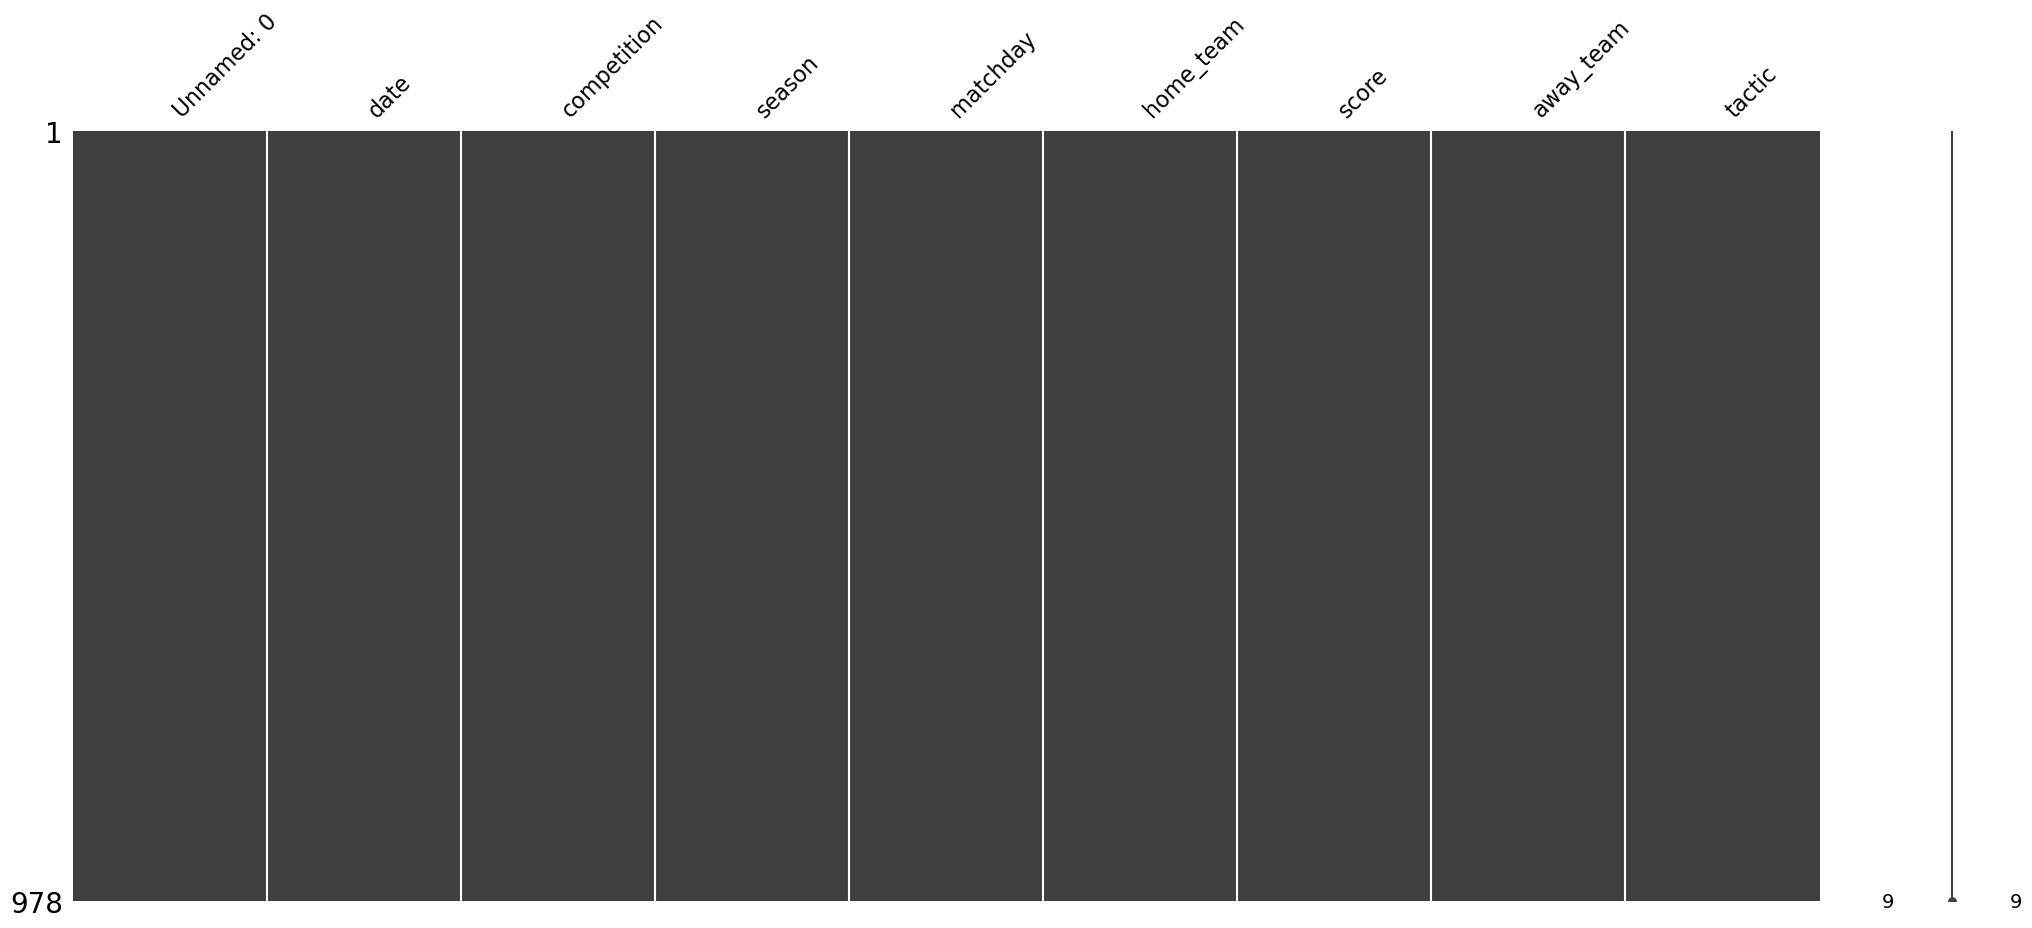

In [31]:
msno.matrix(data_import)

In [74]:
data_import = pd.read_excel('data/jurgen_klopp_dataset.xlsx')
data_import.dtypes
# convert the results column to numeric
#data_import['results'] = pd.to_numeric(data_import['results'], errors='coerce')
#data_import.dtypes





# convert results column to a list
## change score to int
#data_import
## make a new column called new_score and assign it to the score list
#data_import['new_score'] = score
#data_import


Unnamed: 0      int64
date           object
competition    object
season         object
matchday       object
home_team      object
results        object
away_team      object
tactic         object
dtype: object

In [76]:
# change results column to int
data_import['results'] = data_import['results'].astype(int)
data_import

TypeError: int() argument must be a string, a bytes-like object or a number, not 'datetime.time'

In [55]:
# remove the second half of the score after the second colon
for i in range(len(data_import)):
    data_import['results'][i] = data_import['results'][i].split(':00')[0]
data_import

C:\Users\Jay\AppData\Local\Temp\ipykernel_6036\2573579075.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_import['results'][i] = data_import['results'][i].split(':00')[0]


,Unnamed: 0,date,competition,season,matchday,home_team,results,away_team,tactic
0,0,"Oct 9, 2022",Premier League,22/23,10,Arsenal,03:02,Liverpool,4-2-3-1
1,1,"Oct 4, 2022",UEFA Champions League,22/23,Group Stage,Liverpool,02,Rangers,4-2-3-1
2,2,"Oct 1, 2022",Premier League,22/23,9,Liverpool,03:03,Brighton,4-3-3 Attacking
3,3,"Sep 13, 2022",UEFA Champions League,22/23,Group Stage,Liverpool,02:01,Ajax,4-3-3 Attacking
4,4,"Sep 7, 2022",UEFA Champions League,22/23,Group Stage,SSC Napoli,04:01,Liverpool,4-3-3 Attacking
...,...,...,...,...,...,...,...,...,...
973,973,"Apr 1, 2001",2. Bundesliga,00/01,27,SSV Ulm 1846,00:02,1.FSV Mainz 05,2002-04-04 00:00:00
974,974,"Mar 18, 2001",2. Bundesliga,00/01,26,1.FSV Mainz 05,02,VfL OsnabrÃ¼ck,2002-04-04 00:00:00
975,975,"Mar 10, 2001",2. Bundesliga,00/01,25,SaarbrÃ¼cken,01:01,1.FSV Mainz 05,2002-04-04 00:00:00
976,976,"Mar 3, 2001",2. Bundesliga,00/01,24,1.FSV Mainz 05,03:01,Chemnitzer FC,2002-04-04 00:00:00


ValueError: DataFrame constructor not properly called!